In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import networkx as nx
import scipy as sp
import re
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

**Public Bucket for csv https://storage.googleapis.com/datascibucket/cs505/**

In [2]:
data_config = {}
data_config['dataset_month'] = 'oct2016'

In [3]:
df = pd.read_csv(data_config['dataset_month'] + '_committers.csv')

In [4]:
df = df.dropna()
df.head(100)

,committer_name,committer_email,committer_date,repo_name,total_num_commits
0,Tim Gardner,c65a040f7f664378353fb65fc3553df208a14f68@canon...,2016-10-03 01:19:38 UTC,endlessm/linux,454
1,Arno Candel,329f27436ec86be242c31f07766a746ac09e1189@gmail...,2016-10-14 22:42:01 UTC,h2oai/h2o-3,274
2,Vishal Moorthy,6e7e1cdd421bd9e00a7327c63e6b6dc428aeec90@gmail...,2016-10-23 15:17:36 UTC,Veeshal/openmrs-core,199
3,Omar Sahyoun,a96b2b56dc28a05e55acddfc13ca13060f61ada2@gmail...,2016-10-18 16:28:21 UTC,SumOfUs/Champaign,194
4,Michael James Gratton,a17fed27eaa842282862ff7c1b9c8395a26ac320@vee.net,2016-10-03 23:58:17 UTC,GNOME/geary,177
5,Mihail Muhin,8ae75315e10eaef2abb8a518e742a2cdf5fccbe1@jetbr...,2016-10-02 15:05:48 UTC,mihmuh/IntelliJConsole,149
6,Nicolas Matthew Vinson Wauquiez,18f132293a70890e40b1f942be35644307cd0085@gmail...,2016-10-26 03:15:13 UTC,NMVW/pluribus,147
7,calebmer,024ddedc1e44b2a2266115975956c072dec65389@gmail...,2016-10-09 22:59:36 UTC,calebmer/postgraphql,141
8,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,spinnaker/spinnaker,139
9,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,skim1420/spinnaker,139


In [5]:
# only gets rows where there is a valid email for the user
df_valid_emails = df[df.committer_email.str.contains(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", regex=True)]
df_valid_emails.head(100)

C:\Users\Brian\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,committer_name,committer_email,committer_date,repo_name,total_num_commits
0,Tim Gardner,c65a040f7f664378353fb65fc3553df208a14f68@canon...,2016-10-03 01:19:38 UTC,endlessm/linux,454
1,Arno Candel,329f27436ec86be242c31f07766a746ac09e1189@gmail...,2016-10-14 22:42:01 UTC,h2oai/h2o-3,274
2,Vishal Moorthy,6e7e1cdd421bd9e00a7327c63e6b6dc428aeec90@gmail...,2016-10-23 15:17:36 UTC,Veeshal/openmrs-core,199
3,Omar Sahyoun,a96b2b56dc28a05e55acddfc13ca13060f61ada2@gmail...,2016-10-18 16:28:21 UTC,SumOfUs/Champaign,194
4,Michael James Gratton,a17fed27eaa842282862ff7c1b9c8395a26ac320@vee.net,2016-10-03 23:58:17 UTC,GNOME/geary,177
5,Mihail Muhin,8ae75315e10eaef2abb8a518e742a2cdf5fccbe1@jetbr...,2016-10-02 15:05:48 UTC,mihmuh/IntelliJConsole,149
6,Nicolas Matthew Vinson Wauquiez,18f132293a70890e40b1f942be35644307cd0085@gmail...,2016-10-26 03:15:13 UTC,NMVW/pluribus,147
7,calebmer,024ddedc1e44b2a2266115975956c072dec65389@gmail...,2016-10-09 22:59:36 UTC,calebmer/postgraphql,141
8,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,spinnaker/spinnaker,139
9,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,skim1420/spinnaker,139


In [6]:
# Group by repo_name so the results are rows with repo_names with counts for contributions
unique_emailandrepo_df = df_valid_emails.groupby(['committer_email', 'committer_name', 'repo_name'], as_index=False).aggregate(np.sum).sort_values('total_num_commits', ascending=False)
unique_emailandrepo_df.reset_index()

,index,committer_email,committer_name,repo_name,total_num_commits
0,57788,1a73af9e7ae00182733b2292511b814be66f065f@pyjob...,pyjobs,pyjobs/annonces,13433
1,128190,7555aa909aeefc4b48a22650b82530052cae90a6@gmail...,nathanbl,nathanbl/date-info,4088
2,222469,f65d3f2dc139dcfe7b6f0b0a466af3bc5fed8fa7@gmail...,Nathan Chancellor,RootWizard/MagiKernel,3992
3,3963,0554fcc8949639c36b54e10d0ec815032383f759@sina.cn,Pearyman,Pearyman/webexamples,3809
4,76832,333a0a56843ecfbd7d1f247ae3587f84236536bc@hotma...,miatribepi,miatribe/pipvpspy,3667
5,7114,0968282e15ed9e224ab3a4b5d1973c8f7097dcea@gmail...,Ryan Niehaus,ryanniehaus/open_source_package_builder,3479
6,222468,f65d3f2dc139dcfe7b6f0b0a466af3bc5fed8fa7@gmail...,Nathan Chancellor,Miccia94/kernel_moto_shamu,2935
7,107190,5bb7cf2571ba39bcffbb6c25fc088ed51ff9ed06@gmail...,REV3NT3CH,B14CKB1RD-Kernel/B14CKB1RD_Kernel_N6,2909
8,77134,33bdcd680497cab5d61957b985513fceb724a953@gmail...,marcomow,marcomow/keklv,2289
9,132264,7a89f8c141f243fdebb219cb07878db4e9efb474@gmail...,pbaffiliate1,pbaffiliate1/testRepository,1903


In [7]:
def calculate_core_dec(graph):
    core_dec = nx.core_number(graph)
    #print(core, "\n")
    print("Graph: {}, Max Core number: {}".format(graph.name, max(core_dec.values())))
    
    return core_dec

In [8]:
#Plot the networks with networkx

colors = ['#787878', '#856b6b', '#965a5b', '#a7494b', '#bb3537', '#cb2528', '#cb2528', '#f00004']

def plot_network(graphs, layout, node_size, with_labels):

    for i, graph in enumerate(graphs):
        core_dec = calculate_core_dec(graph)
#         print(core_dec)
        node_colors = colors
        plt.figure()
        if layout == '':
            nx.draw(graph, node_color=node_colors, with_labels=with_labels, node_size=node_size)
        elif layout == 'circular_layout':
            nx.draw(graph, node_color=node_colors, pos=nx.circular_layout(graph), with_labels=with_labels, node_size=node_size)
        elif layout == 'random_layout':
            nx.draw(graph, node_color=node_colors, pos=nx.random_layout(graph), with_labels=with_labels, node_size=node_size)
        elif layout == 'shell_layout':
            nx.draw(graph, node_color=node_colors, pos=nx.shell_layout(graph), with_labels=with_labels, node_size=node_size)
        else:
            nx.draw(graph, node_color=node_colors, pos=nx.spectral_layout(graph), with_labels=with_labels, node_size=node_size) 

## Degree distribution

In [9]:
#Degree distributions
def plot_degree_distributions(graphs):
    for graph in graphs:
        degree_sequence=sorted(nx.degree(graph).values(),reverse=True) 
        dmax=max(degree_sequence)
        print('Degree max for {}: {}'.format(graph, dmax))
        
        plt.figure()
        h,bins,patches = plt.hist(degree_sequence,bins=range(0,dmax))
        plt.title("Degree distribution for {}".format(graph.name))
        plt.xlabel("degree")
        plt.ylabel("number of nodes")

# plot_degree_distributions([G_onlyrepos, G_onlyusers])

The degree distribution looks like what you would expect from a small world network, given that there are very few with high degrees but they do exist unlike a degree distribution of a random network.

## Clustering Coefficients and Stats

In [10]:
def print_stats_of_notconnected(graphs):
    for graph in graphs:
        print('Stats for {}:'.format(graph.name))
        #print('\tDiameter: {}'.format(nx.diameter(graph)))
        #print('\tAverage shortest path length: {}'.format(nx.average_shortest_path_length(graph)))
        
        ccall = nx.clustering(graph)
        ave_clustering_coefficient = nx.average_clustering(graph)
        print('\tAverage clustering coefficient: {}'.format(ave_clustering_coefficient))
        
def print_stats_of_connected(graphs):
    for graph in graphs:
        print('Stats for {}:'.format(graph.name))
        print('\tDiameter: {}'.format(nx.diameter(graph)))
        print('\tAverage shortest path length: {}'.format(nx.average_shortest_path_length(graph)))
        
        ccall = nx.clustering(graph)
        ave_clustering_coefficient = nx.average_clustering(graph)
        print('\tAverage clustering coefficient: {}'.format(ave_clustering_coefficient))
        
        
def plot_clusteringcoeff_distributions(graphs):
    for graph in graphs:
        plt.figure()
        h,bins,patches = plt.hist(list(nx.clustering(graph).values()))
        plt.title("Clustering coefficient distribution for {}".format(graph.name))
        plt.ylabel("number of nodes")

## Create Graphs

In [11]:
B = nx.Graph()
B.add_nodes_from(unique_emailandrepo_df['committer_email'].head(5000),bipartite=0)
B.add_nodes_from(unique_emailandrepo_df['repo_name'].head(5000),bipartite=1)
B.add_edges_from(unique_emailandrepo_df[['committer_email','repo_name']].head(5000).values)
nx.bipartite.is_bipartite(B)
B.name = 'Bipartite Graph of Users and Repositories'

nx.write_gml(B, data_config['dataset_month'] + '_bipartite_graph.gml')

In [12]:
one_mode_users = nx.bipartite.projected_graph(B, unique_emailandrepo_df['committer_email'].head(5000))
one_mode_users.name = 'One-mode Bipartite Graph of Users'
nx.write_gml(one_mode_users, data_config['dataset_month'] + 'one_mode_users.gml')

In [13]:
one_mode_repos = nx.bipartite.projected_graph(B, unique_emailandrepo_df['repo_name'].head(5000))
one_mode_repos.name = 'One-mode Bipartite Graph of Repositories'
nx.write_gml(one_mode_repos, data_config['dataset_month'] + 'one_mode_repos.gml')

Graph: Bipartite Graph of Users and Repositories, Max Core number: 10


<IPython.core.display.Javascript object>


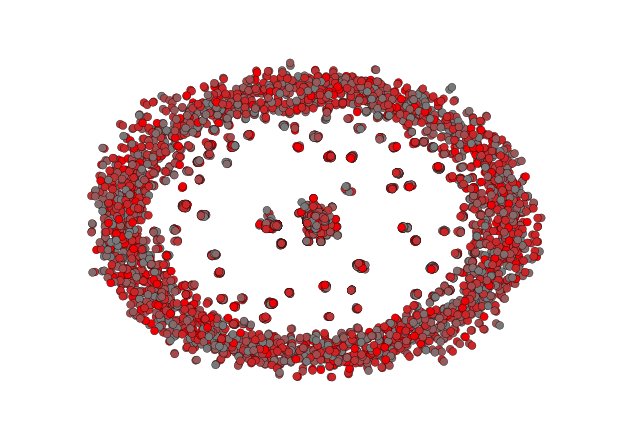

In [14]:
#Plot graphs
node_size = 50
with_labels = False
plot_network([B], '', node_size, with_labels)

# TODO: Get graphs from GEPHI

## Analyze Graphs

### Degree Distributions:

Degree max for One-mode Bipartite Graph of Users: 68


<IPython.core.display.Javascript object>


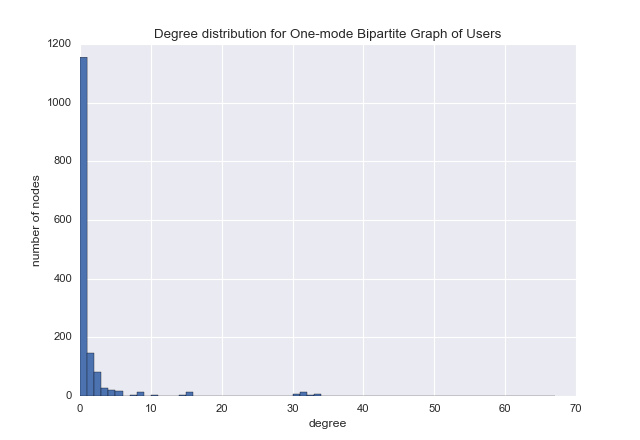

Degree max for One-mode Bipartite Graph of Repositories: 724


<IPython.core.display.Javascript object>


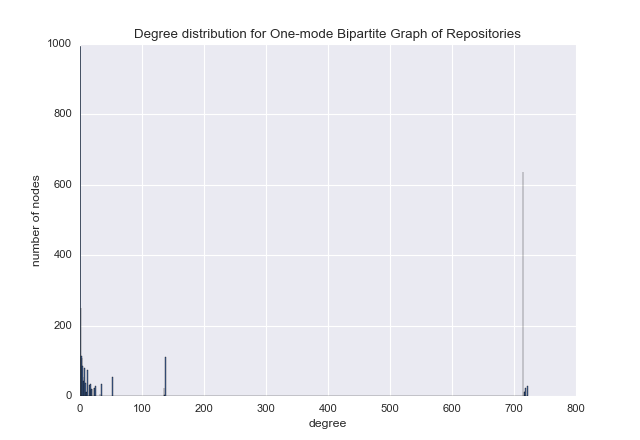

Degree max for Bipartite Graph of Users and Repositories: 715


<IPython.core.display.Javascript object>


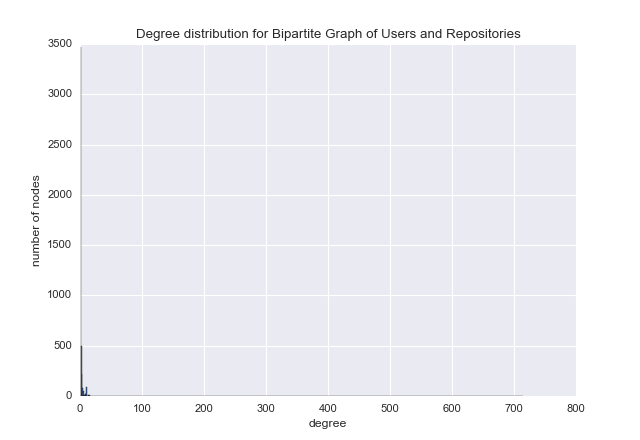

In [15]:
plot_degree_distributions([one_mode_users, one_mode_repos, B])

The graphs look like exponential-log graphs as real-life networks should look, however, there is a weird spike in number of nodes in the one-mode repositories only graph, with a high degree. There are exactly 637 nodes representing repos with degrees of exactly 714. This could mean there are 714 repositories that a set of users (like developers in a company) needed to contribute to for some reason. When observing the graph visually, there is a massive cluster of interconnected nodes that represents this spike in data.

In [16]:
#Get the repos with degree = 714


### Clustering Coefficient Distributions:

Stats for One-mode Bipartite Graph of Users:
	Average clustering coefficient: 0.13593938795150975
Stats for One-mode Bipartite Graph of Repositories:
	Average clustering coefficient: 0.5872608464613179
Stats for Bipartite Graph of Users and Repositories:
	Average clustering coefficient: 0.0


<IPython.core.display.Javascript object>


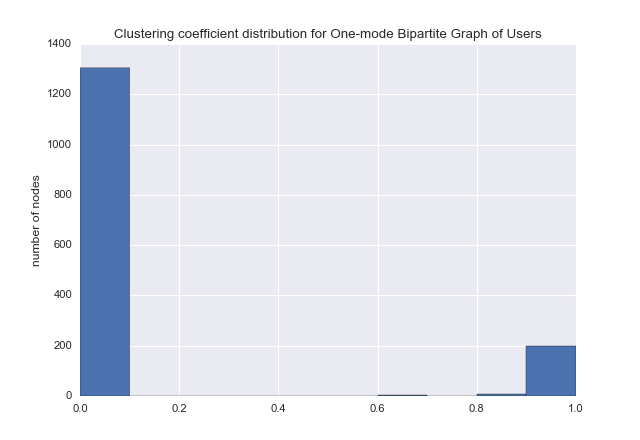

<IPython.core.display.Javascript object>


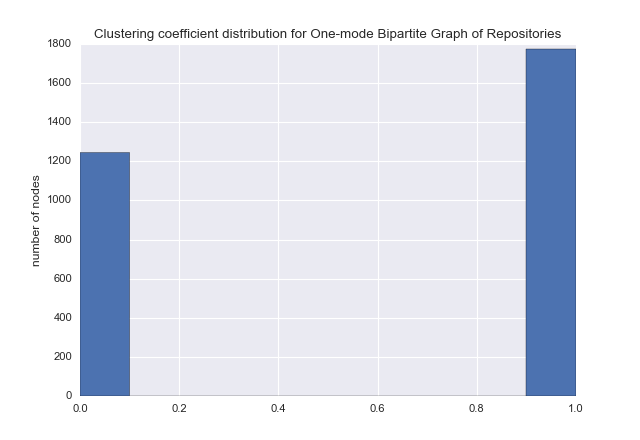

<IPython.core.display.Javascript object>


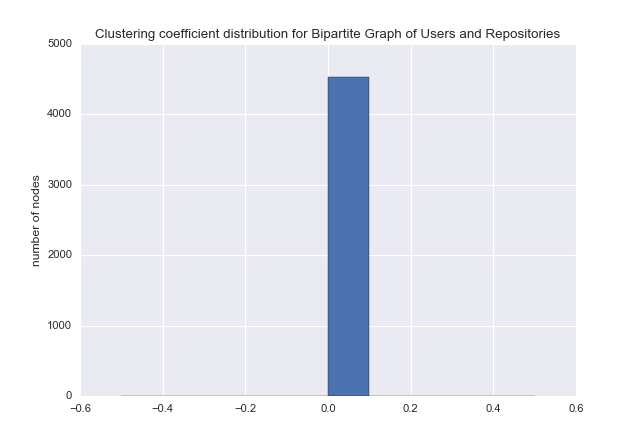

In [17]:
#Plot Clustering Coefficients of graph of repos and graph of users
print_stats_of_notconnected([one_mode_users, one_mode_repos, B])
plot_clusteringcoeff_distributions([one_mode_users, one_mode_repos, B])

It makes sense that there would be such a vast difference in clustering coefficients, due to the connectivity observed between repositories. Of the nodes with degrees greater than 0, usually there are highly interconnected subgraphs between users or repositories. The bipartite graph of course has clustering coefficients of 0 because there is no possible way for a triangle to form between connected triplets of nodes.  

# Centrality

In [18]:
def plot_network_centralities(graphs, with_labels):

    for i, graph in enumerate(graphs):
        pos = nx.spring_layout(graph)
        
        plt.figure(figsize=(12,4))
        plt.subplot(131)
        cent = np.array(list(nx.closeness_centrality(graph).values()))
        scaler = MinMaxScaler((50,800))
        scaledC = scaler.fit_transform(cent[:,np.newaxis])
        nx.draw(graph, node_size=scaledC, pos=pos, node_color='#6699cc', with_labels=with_labels)
        plt.title("Closeness Centrality")

        plt.subplot(132)
        cent = np.array(list(nx.betweenness_centrality(graph).values()))
        scaler = MinMaxScaler((50,800))
        scaledC = scaler.fit_transform(cent[:,np.newaxis])
        nx.draw(graph, node_size=scaledC, pos=pos, node_color='#6699cc', with_labels=with_labels)
        plt.title("Betweenness Centrality")

        plt.subplot(133)
        cent = np.array(list(nx.eigenvector_centrality(graph).values()))
        scaler = MinMaxScaler((50,800))
        scaledC = scaler.fit_transform(cent[:,np.newaxis])
        nx.draw(graph, node_size=scaledC, pos=pos, node_color='#6699cc', with_labels=with_labels)
        _=plt.title("Eigenvector Centrality")

<IPython.core.display.Javascript object>


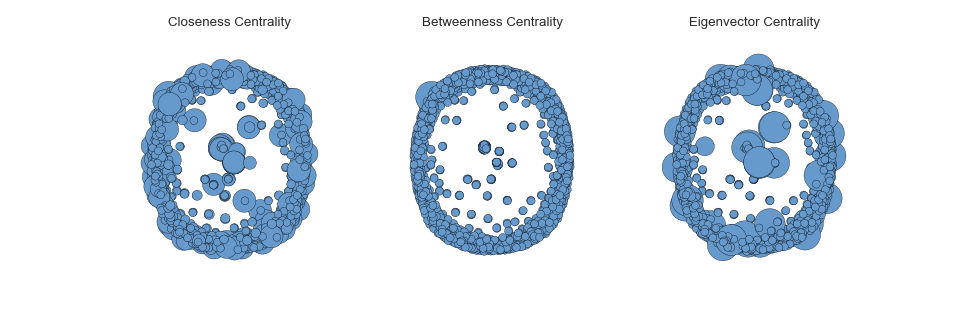

<IPython.core.display.Javascript object>


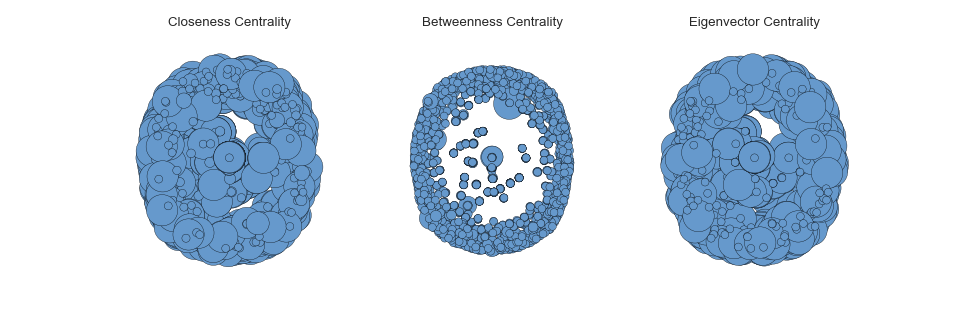

In [19]:
plot_network_centralities([one_mode_users, one_mode_repos], with_labels=False)

<IPython.core.display.Javascript object>


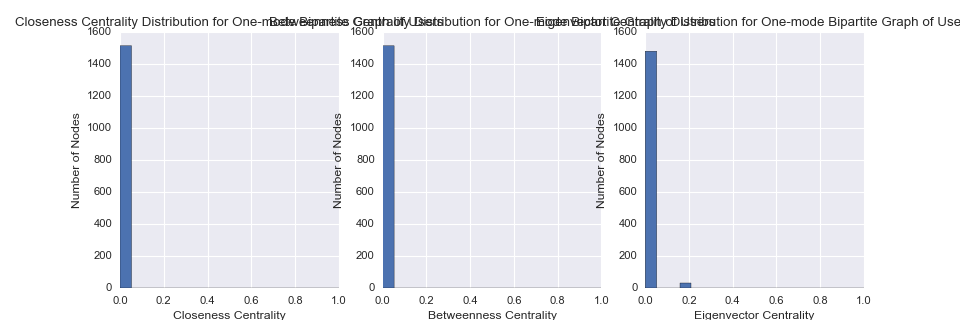

Closeness max for One-mode Bipartite Graph of Users: 0.0449438202247191
Betweenness max for One-mode Bipartite Graph of Users: 0.0019554222021725878
Eigenvector max for One-mode Bipartite Graph of Users: 0.1815849898224109


<IPython.core.display.Javascript object>


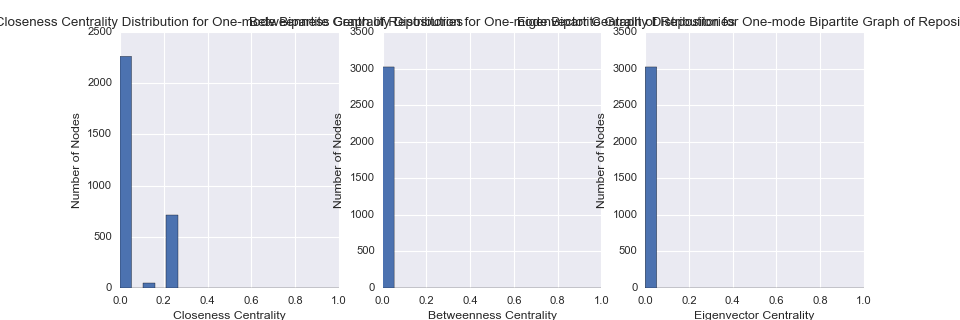

Closeness max for One-mode Bipartite Graph of Repositories: 0.24016644195918244
Betweenness max for One-mode Bipartite Graph of Repositories: 0.0011539532324501116
Eigenvector max for One-mode Bipartite Graph of Repositories: 0.0374102191073661


In [21]:
#Degree distributions
def plot_centrality_distributions(graphs):
    for graph in graphs:
        plt.figure(figsize=(12,4))
        
        plt.subplot(131)
        cent = np.array(list(nx.closeness_centrality(graph).values()))
        closeness_sequence=sorted(cent,reverse=True) 
        dmax=max(closeness_sequence)
        print('Closeness max for {}: {}'.format(graph, dmax))
        plt.hist(cent,bins=np.linspace(0,1,20))
        plt.title("Closeness Centrality Distribution for {}".format(graph.name))
        plt.xlabel('Closeness Centrality')
        _=plt.ylabel('Number of Nodes')
        
        plt.subplot(132)
        cent = np.array(list(nx.betweenness_centrality(graph).values()))
        betweenness_sequence=sorted(cent,reverse=True) 
        dmax=max(betweenness_sequence)
        print('Betweenness max for {}: {}'.format(graph, dmax))
        plt.hist(cent,bins=np.linspace(0,1,20))
        plt.title("Betweenness Centrality Distribution for {}".format(graph.name))
        plt.xlabel('Betweenness Centrality')
        _=plt.ylabel('Number of Nodes')

        plt.subplot(133)
        cent = np.array(list(nx.eigenvector_centrality(graph).values()))
        eigenvector_sequence=sorted(cent,reverse=True) 
        dmax=max(eigenvector_sequence)
        print('Eigenvector max for {}: {}'.format(graph, dmax))
        plt.hist(cent,bins=np.linspace(0,1,20))
        plt.title("Eigenvector Centrality Distribution for {}".format(graph.name))
        plt.xlabel('Eigenvector Centrality')
        _=plt.ylabel('Number of Nodes')
        
plot_centrality_distributions([one_mode_users, one_mode_repos])

# Find Subgraphs that are Non-Cliques and of Decent Size

In [48]:
#Generate connected subgraphs 
graph_to_get_subgraphs_of = B
print(graph_to_get_subgraphs_of.name)
x = nx.connected_component_subgraphs(graph_to_get_subgraphs_of)
x

Bipartite Graph of Users and Repositories


<generator object connected_component_subgraphs at 0x00000278DF5D30F8>

In [49]:
#weed out graphs with less than 5 degrees max

subgraphs = [g for g in x]

subs = []
for graph in subgraphs: 
    if max(sorted(nx.degree(graph).values(), reverse=True)) > 5: #weed out graphs with less than 5 degrees max
        subs.append(graph)
        
subs

len(subs)

51

In [50]:
#Get non-cliques in s

non_cliques = []
cliques = []

for g in subs:
    lst = list(nx.degree(g).values())
    if lst[1:] == lst[:-1]:
        cliques.append(g)
    else:
        non_cliques.append(g)
        
print("Non-Cliques: {}".format(len(non_cliques)))
print("Cliques: {}".format(len(cliques)))

Non-Cliques: 51
Cliques: 0


In [51]:
#Write to files
import os, sys

# Path to be created
cliques_path = "cliques/" + data_config['dataset_month'] + "/" + graph_to_get_subgraphs_of.name
if not os.path.exists(cliques_path):
    os.makedirs(cliques_path)

noncliques_path = "noncliques/" + data_config['dataset_month'] + "/" + graph_to_get_subgraphs_of.name
if not os.path.exists(noncliques_path):
    os.makedirs(noncliques_path)

for i, j in enumerate(non_cliques):
    nx.write_gml(j, noncliques_path + "/non_clique_subgraph_{}.gml".format(i))
    
for i, j in enumerate(cliques):
    nx.write_gml(j, cliques_path + "/clique_subgraph_{}.gml".format(i))